# HW7

In [2]:
import matplotlib
import numpy as np
from numpy import linalg as LA
import matplotlib.cm as cm
import matplotlib.mlab as mlab
import matplotlib.pyplot as plt
import math
import scipy as sp
from scipy import io
from scipy.stats import logistic as sig
import pandas as pd

np.set_printoptions(threshold=np.nan)

import sklearn
from sklearn.preprocessing import normalize
import csv
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.utils import shuffle as shuffle
from sklearn.utils import resample as resample
from sklearn.preprocessing import StandardScaler
%matplotlib inline

# NP FNS

In [3]:
def vec(arr): # d b 1 --> (d, 1)
    return arr.reshape((arr.shape[0], 1))

In [4]:
def arr(vec): # 1 by d --> (d, )
    return vec.flatten()

# Problem 1: Lloyd's Method on MNIST

In [11]:
dict_mnist_data = sp.io.loadmat("mnist_data/images.mat")
points = dict_mnist_data['images']

In [12]:
'''

    THIS WAS STOLEN (I mean borrowed) FROM http://flothesof.github.io/k-means-numpy.html

'''
def kMeans(points, k, numIter):
    centroids = initialize_centroids(points, k)
    for i in range(numIter):
        lstIndices2ClosestCentroid = closest_centroid(points, centroids)
        centroids = move_centroids(points, lstIndices2ClosestCentroid, centroids)
    return centroids

def initialize_centroids(points, k):
    """returns k centroids from the initial points"""
    centroids = points.copy()
    np.random.shuffle(centroids)
    return centroids[:k]


def closest_centroid(points, centroids):
    """returns an array containing the index to the nearest centroid for each point"""
    distances = np.sqrt(((points - centroids[:, np.newaxis])**2).sum(axis=2))
    return np.argmin(distances, axis=0)

def move_centroids(points, closest, centroids):
    """returns the new centroids assigned from the points closest to them"""
    return np.array([points[closest==k].mean(axis=0) for k in range(centroids.shape[0])])

def visualize_centroids(centroids):
    i = 0
    for c in centroids:
        plt.title('Centroid {label}'.format(label=i))
        c = c.reshape((28, 28))
        plt.imshow(c, cmap='gray')
        plt.show()
        i+=1

In [13]:
points = np.reshape(points, (784, 60000)).T
centroids = kMeans(points, 5, 5)
visualize_centroids(centroids)

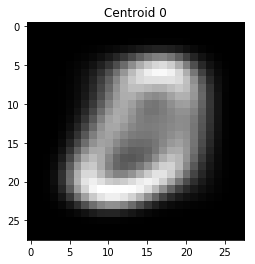

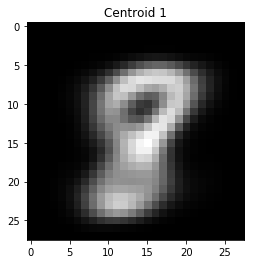

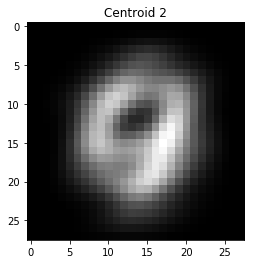

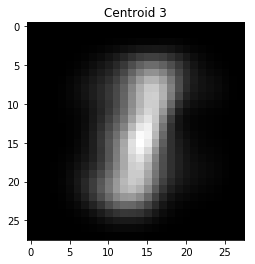

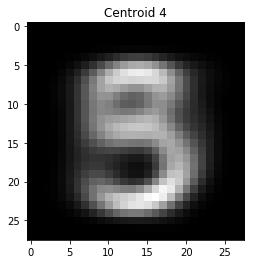